# **Import Library**

In [0]:
import pandas as pd
import numpy as np
from random import sample

import matplotlib.pyplot as plt
from matplotlib import style

# **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
!ls "drive/My Drive/malin"
data = pd.read_csv('/content/drive/My Drive/malin/used_cars.csv')
data.head(2)

used_cars.csv


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884


# **Eksplorasi dan Persiapan data**

Feature yg dipakai = lat and long

In [0]:
data ['lat'] = data['lat'].replace(np.NaN , data['lat'].mean())
data ['long'] = data['long'].replace(np.NaN , data['long'].mean())
data ['year'] = data['year'].replace(np.NaN , data['year'].mean())
data ['odometer'] = data['odometer'].replace(np.NaN , data['odometer'].mean())

data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#print(data)
data=data.drop('county',axis=1)
data=data.drop('size',axis=1)
data=data.drop('condition',axis=1)
data=data.drop('cylinders',axis=1)


## MISSING VALUE

data =data.dropna(how='all', subset=['title_status'])
data = data.fillna('-')
data=data.dropna()




## **Taking care Outlier**
Melihat outlier pada feature year dan odometer

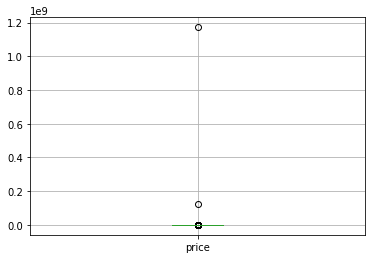

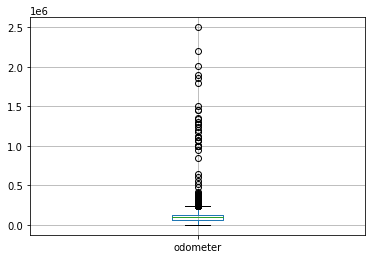

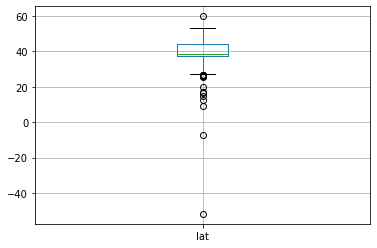

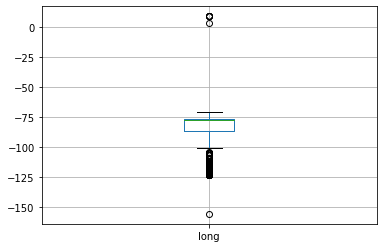

In [5]:
plt.figure()
data.boxplot(['price'])

plt.figure()
data.boxplot(['odometer'])

plt.figure()
data.boxplot(['lat'])

plt.figure()
data.boxplot(['long'])


In [0]:
#Taking care missing value, hanya di atribut price. karena atribut price tidak mungkin <= 0. sehingga data price yang <= 0 akan dihapus

data = data[data.price > 0]

In [7]:
print(data.isnull().sum()) 

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
vin             0
drive           0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
dtype: int64


In [8]:
kolom=data.columns.values.tolist()
print(kolom)
for x in kolom[0:-2]:
    if data[x].dtype=='object':
        #print("nice")
        data[x]=data[x].astype(str)
print(data['odometer'])
data.dtypes

['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'vin', 'drive', 'type', 'paint_color', 'image_url', 'description', 'state', 'lat', 'long']
0         63500.0
2          7554.0
4         70150.0
5        120057.0
6         95484.0
           ...   
19995     29894.0
19996     43406.0
19997     32867.0
19999     30486.0
20000     22078.0
Name: odometer, Length: 17408, dtype: float64


id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
type             object
paint_color      object
image_url        object
description      object
state            object
lat             float64
long            float64
dtype: object

# **Exploration Data**

In [9]:
data.shape

(17408, 21)

In [10]:
data.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
type             object
paint_color      object
image_url        object
description      object
state            object
lat             float64
long            float64
dtype: object

In [11]:
data.describe()

,id,price,year,odometer,lat,long
count,1.740800e+04,1.740800e+04,17408.000000,1.740800e+04,17408.000000,17408.000000
mean,7.043212e+09,8.798878e+04,2009.345242,1.024656e+05,40.572577,-86.904214
std,4.704549e+06,8.935022e+06,8.133930,7.763948e+04,4.509480,18.567203
min,7.032597e+09,1.000000e+00,1917.000000,0.000000e+00,-51.812200,-155.901000
25%,7.040080e+09,5.695000e+03,2006.000000,6.045600e+04,37.289500,-84.411800
50%,7.043899e+09,1.049500e+04,2011.000000,9.916435e+04,38.273500,-77.609400
75%,7.047130e+09,1.899000e+04,2015.000000,1.315405e+05,44.457800,-76.243700
max,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,59.746600,9.095700


In [12]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,vin,drive,type,paint_color,image_url,description,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,ut,40.7372,-111.858
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,-,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,ut,40.3744,-104.694
5,7034406582,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,13999,2009.0,ram,-,gas,120057.0,clean,automatic,1D3HV18P89S777871,4wd,pickup,silver,https://images.craigslist.org/00y0y_RR9x2lk7eh...,"2009 RAM 1500 4WD Quad Cab 140.5"" ST"" Offe...",ut,40.3744,-104.694
6,7034405619,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2017.0,ford,f-350,diesel,95484.0,clean,automatic,1FT8W3BT2HEE98744,4wd,pickup,white,https://images.craigslist.org/00k0k_lIBatiU90s...,2017 Ford Super Duty F-350 F350 F 350 SRW Crew...,ut,40.3744,-104.694


# **Pemodelan**

## **Visualisasi data sebelum clustering**

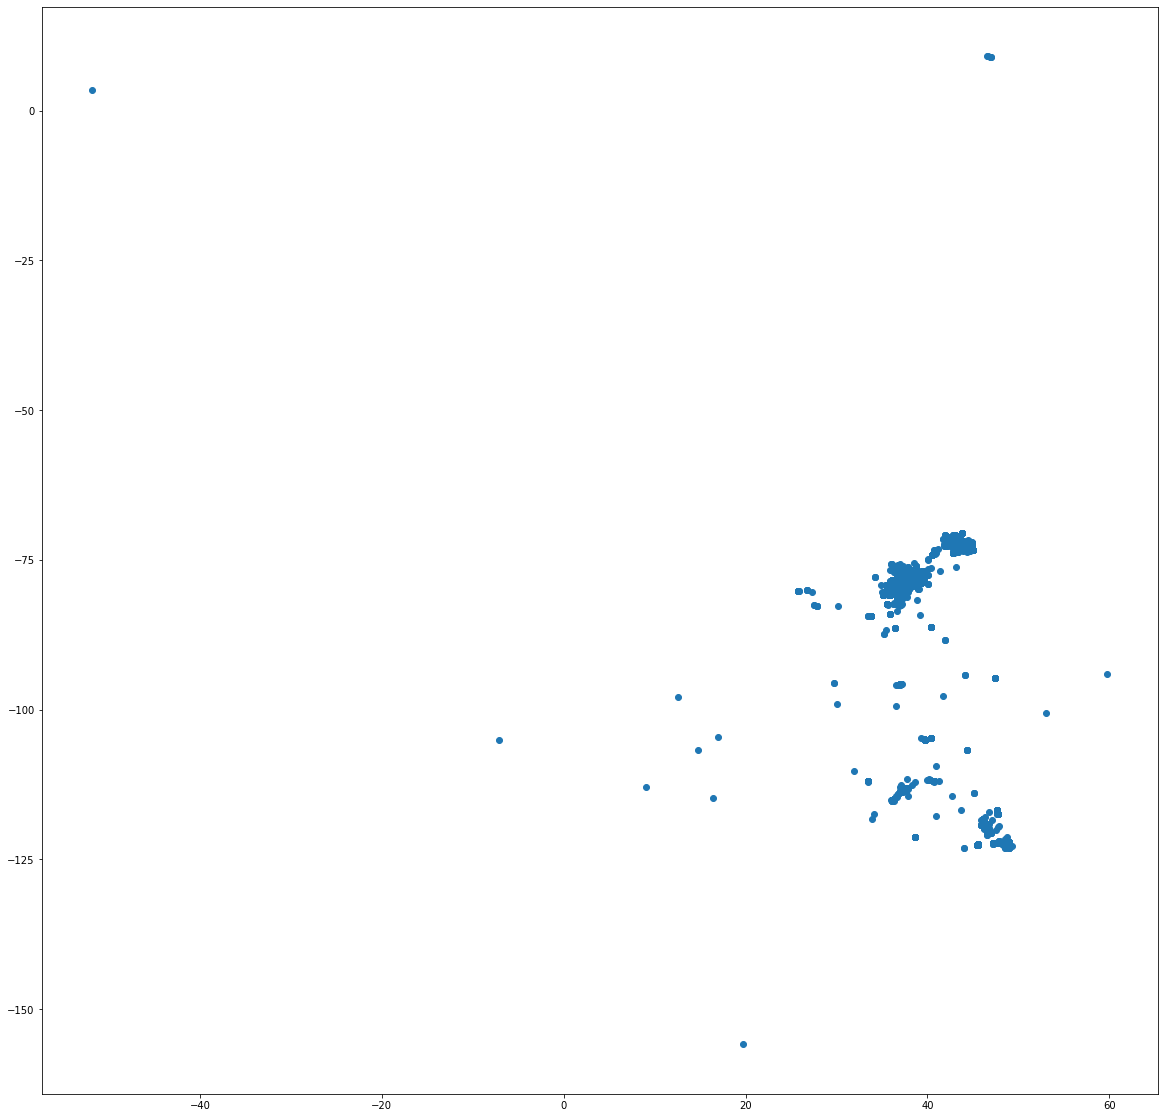

In [0]:
plt.figure(figsize=(20,20))
# print(data['price'][0],data['odometer'][0])
# print(min(data['price']))
# print(max(data['price']))

# print(min(data['odometer']))
# print(max(data['odometer']))

# plt.xticks(np.arange(min(data['price']),max(data['price']),50000))
# print("ASS2")

# plt.yticks(np.arange(min(data['odometer']),max(data['odometer']),50000))
# print("ASS")
lat=(data['lat'])
long=(data['long'])
plt.scatter(lat,long)
plt.show()

## **Algoritma K-Means**

In [0]:
class K_Means:

    #inisiasi nilai k dan maksimum perulangan
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

 
    def fit(self, data):

        self.centroids = {} #membuat centroids

        #menginisiasi nilai centroid, nilai 'k' pertama pada elemen di dataset akan jadi nilai centroid
        for i in range(self.k):
            self.centroids[i] = data[i]

        #mulai iterasi
        for i in range(self.max_iterations):
            self.jarak = 0   #self.jarak untuk menghitung jarak data ke centroid
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #mencari jarak antara point ke cluster, lalu memilih centroid terdekat
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                self.jarak=self.jarak+min(distances)   #self.jarak = akan memilih jarak mana yg paling terdekat dengan centroid
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #mencari nilai cluster dengan rata-rata, lalu re-calculate centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #jika nilai centroid tidak terlalu berubah nilainya, maka dianggap optimal. lalu break(stop)
            if isOptimal:
                break

## **Hasil Cluster**

In [15]:
data_cluster=data[['lat','long']]
#print(data.dtypes)
dataset = data_cluster.astype(float).values.tolist()
X = data_cluster.values

km = K_Means(2)
km.fit(X)
X

array([[  40.7372, -111.858 ],
       [  40.5881, -111.884 ],
       [  40.3744, -104.694 ],
       ...,
       [  46.5642, -120.496 ],
       [  46.5642, -120.496 ],
       [  46.2348, -119.128 ]])

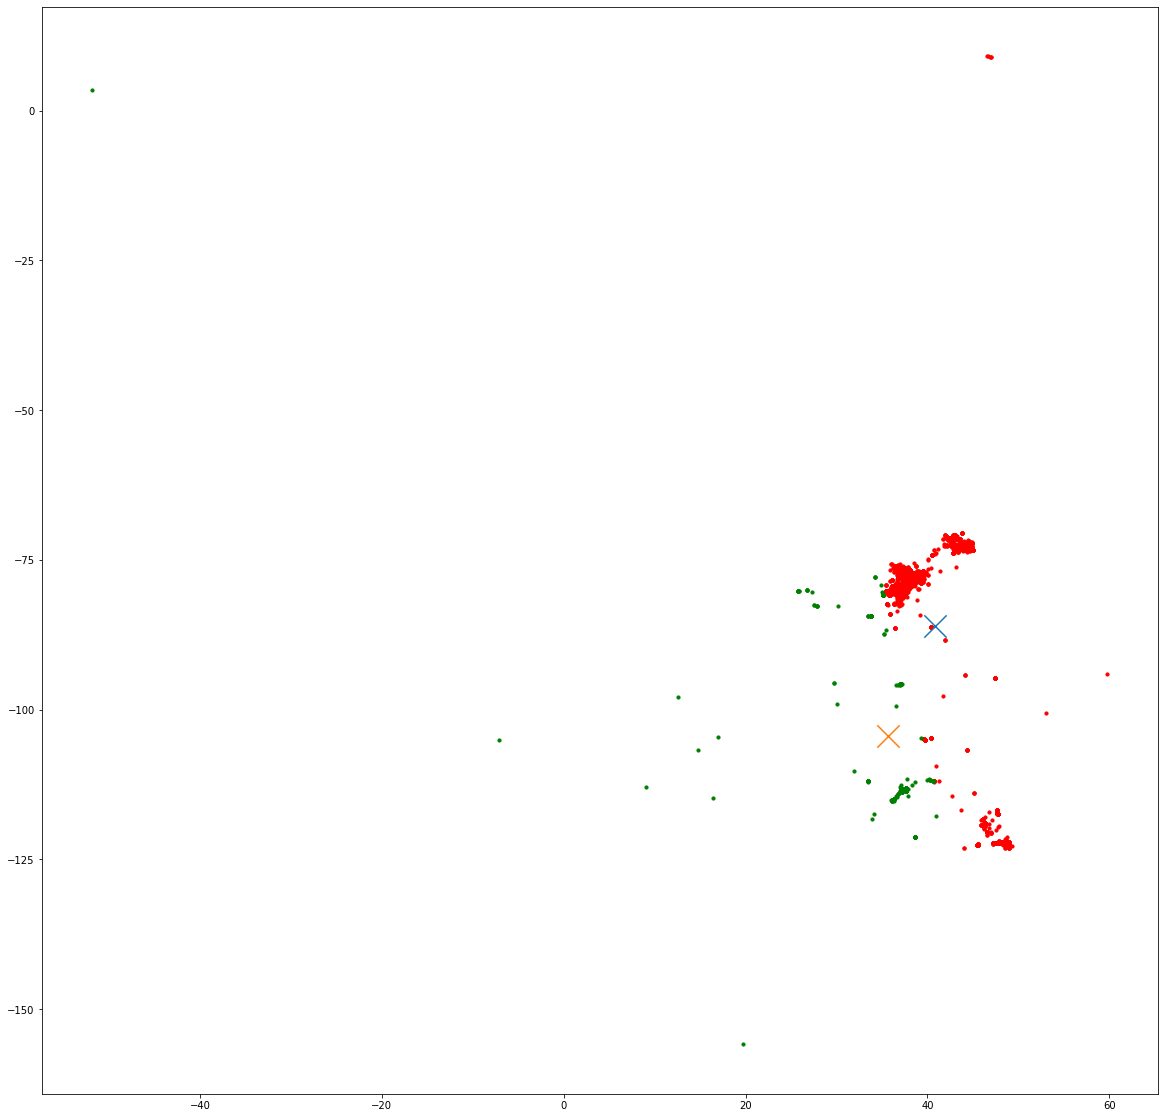

In [0]:
colors = 10*["r", "g", "c", "b", "k"]
plt.figure(figsize=(20,20))

#plt.xlim(0,100000)
#plt.ylim(0,100000)

data['Cabang']=''
for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 10)
        #data.loc[(data['lat'] == features[0]) & (data['long'] == features[1]), 'Region'] = classification
        

        
for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 500, marker = "x")

# **Evaluasi**

## **ELBOW METHOD**

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Sum Squared Error/Inertia')

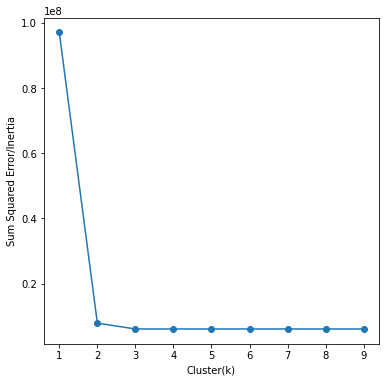

In [16]:
sse = []
list_k = list(range(1,10))

for k in list_k:
  model = K_Means(k)
  model.fit(X**2)
  sse.append(model.jarak)

#plot sse
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Cluster(k)')
plt.ylabel('Sum Squared Error/Inertia')

## **nilai sse model 1**

In [25]:
#didaoat dari self.jarak pada model KM dikuadratkan
sse1=km.jarak**2
sse1

265795588455.95013

# **Eksperimen**

dengan mengganti nilai K= 3

In [0]:
data_cluster2=data[['lat','long']]
#print(data.dtypes)
dataset = data_cluster.astype(float).values.tolist()
X2 = data_cluster.values

km2 = K_Means(3)
km2.fit(X2)


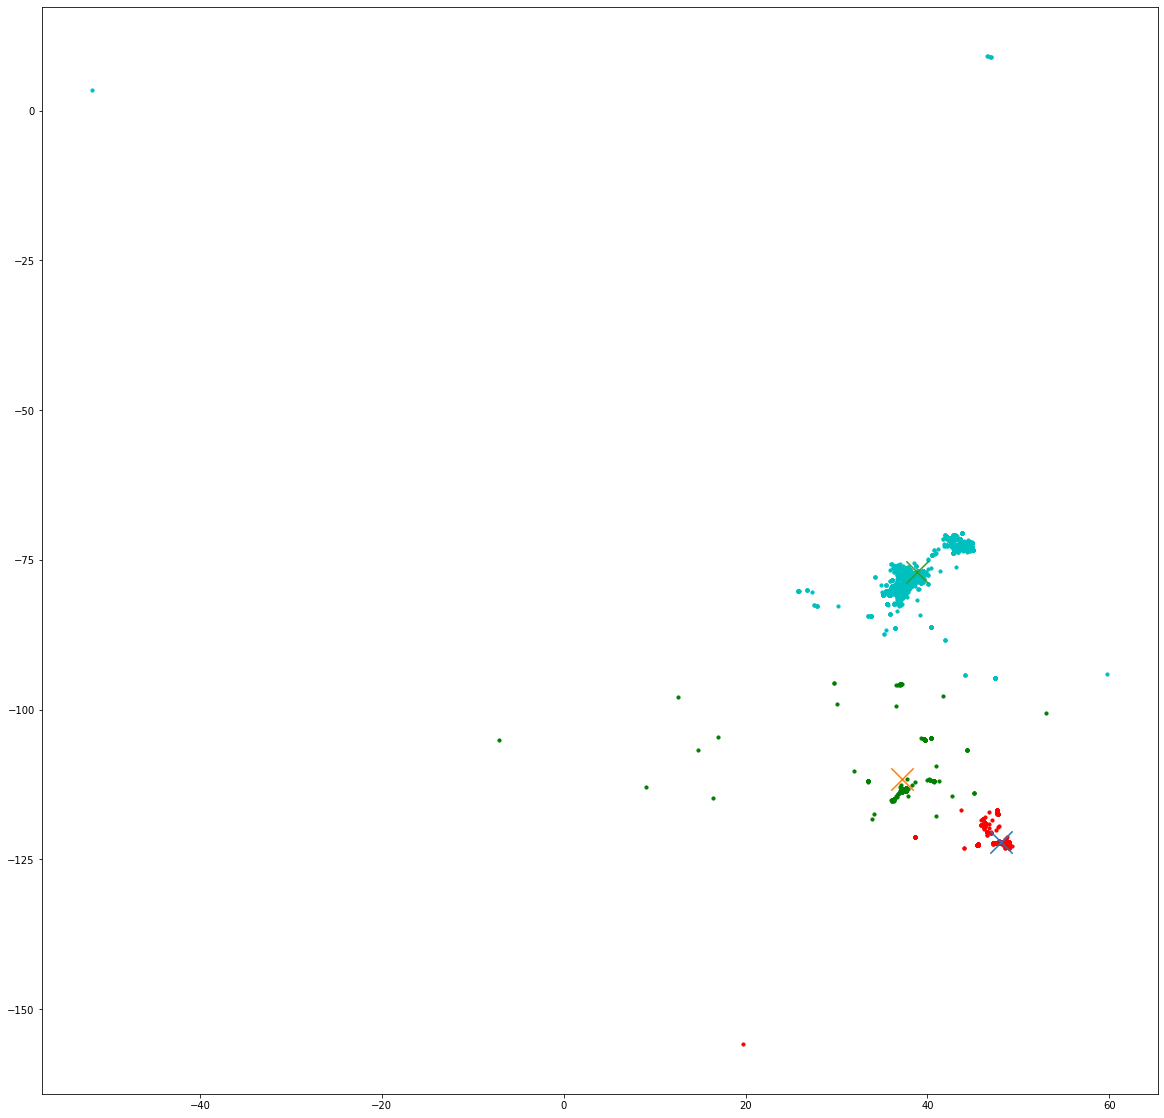

In [0]:
colors = 10*["r", "g", "c", "b", "k"]
plt.figure(figsize=(20,20))



data['Cabang']=''
for classification in km2.classes:
    color = colors[classification]
    for features in km2.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 10)
        
for centroid in km2.centroids:
        plt.scatter(km2.centroids[centroid][0], km2.centroids[centroid][1], s = 500, marker = "x")

# **Evaluasi**

## **Elbow method model 2**

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Sum Squared Error/Inertia')

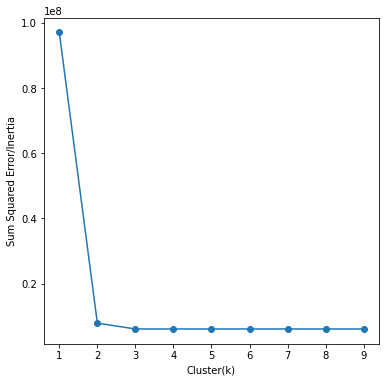

In [30]:
sse = []
list_k = list(range(1,10))

for k in list_k:
  model = K_Means(k)
  model.fit(X2**2)
  sse.append(model.jarak)

#plot sse
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Cluster(k)')
plt.ylabel('Sum Squared Error/Inertia')

## **nilai sse model 2**

In [32]:
sse2 = km2.jarak**2
sse2

2426932734.7782755

# **unduh dataset**

In [0]:
# data_cluster2=data[['lat','long']]
data_cluster2.columns = [['lat','long']]


In [0]:
data_cluster2.to_csv('dataset_clustering.csv',index = False)